In [1]:
import numpy as np
import pandas as pd
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as utils
import matplotlib.pyplot as plt
import statistics 
from statistics import mode
from torch.optim.lr_scheduler import StepLR
%matplotlib inline

In [2]:
def train_epoch(model, opt, criterion, batch_size=100):
    model.train()
    losses = []
    for index in range(0, x_train.shape[0], batch_size):
        x_batch = x_train[index:index + batch_size, :]
        label_batch = labels[index:index + batch_size, :]
        opt.zero_grad()
        prediction = model(x_batch)
        loss = criterion(prediction,label_batch)
        loss.backward()
        opt.step()
        losses.append(loss.item())
    losses = sum(losses)/len(losses)
    return losses

In [3]:
def baselinePrediction(output1):
    predictions_array=[]
    for i in range(5):
        test=np.random.randint(2, size=len(x_test))
        test = list(test)
        predictions_array.append(test)
    predictions_array = np.array(predictions_array)
    print(predictions_array.shape)
    final_prediction =np.zeros(predictions_array.shape[1])
    for i in range(predictions_array.shape[1]):
        temp_list=predictions_array[:,i].tolist()
        final_prediction[i]=mode(temp_list)
    count=0
    for i in range(output1.shape[0]):
        if(output1[i]==final_prediction[i]):
            count = count+1
    print("Accuracy is ", (count/final_prediction.shape[0])*100)
    return (count/final_prediction.shape[0])*100

In [4]:
def testingAccuracy(model,x_test,output1):
    predictions_array=[]
    model = model.eval()
    with torch.no_grad():
        predictions = model(x_test)
    test = np.asarray(predictions)
    
    test[test>0.5]=1
    test[test<=0.5]=0

    count=0
    for i in range(test.shape[0]):
        if(output1[i]==test[i]):
            count = count+1
    print("Accuracy is ", (count/test.shape[0])*100)
    return (count/test.shape[0])*100

In [5]:
#change the dataframe to numpy array to tensor array
def changeToTensor(dataFrame):
    dataFrame= (dataFrame-dataFrame.min())/(dataFrame.max()-dataFrame.min())
    x = dataFrame.values
    x= x.astype('float64')
    x= torch.Tensor(x)
    return x

In [6]:
def preProcess(data):
    data_numpy = data.values
    labels = data_numpy[:,-1]
    labels= labels.astype('float64')
    #labels= torch.Tensor(labels)
    data_numpy = data.drop(['date','Occupancy'],axis=1)
    features = changeToTensor(data_numpy)
    return features, labels

In [7]:
class Net_2Layer(nn.Module):
    def __init__(self,size,H_size,H2_size):
        super(Net_2Layer, self).__init__()
        self.fc1 = nn.Linear(size,H_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(H_size,H2_size)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(H2_size,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [8]:
### create a model with pytorch#####
class Net_H(nn.Module):
    def __init__(self,size,H_size):
        super(Net_H, self).__init__()
        self.fc1 = nn.Linear(size,H_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(H_size,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [9]:
### create a model with pytorch#####
class Net_5(nn.Module):
    def __init__(self,size):
        super(Net_5, self).__init__()
        self.fc1 = nn.Linear(size,5)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(5,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [10]:
num_epochs = 100

In [11]:
criteria= nn.BCELoss()

In [12]:
train_data = pd.read_csv('train.txt',sep=',')
test_data = pd.read_csv('test.txt',sep=',')

In [13]:
train_data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [14]:
x_train, labels =preProcess(train_data)
labels_accuracy = labels
labels= torch.Tensor(labels)
labels = labels.unsqueeze(1)
print(x_train.shape, labels.shape)

torch.Size([8143, 5]) torch.Size([8143, 1])


In [15]:
x_test, output = preProcess(test_data)

### Part (a) printing the loss value across 100 epochs for batch training

In [16]:
model = Net_5(x_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [17]:
loss_to_plot_batch=[]
for e in range(num_epochs):
    e_losses = train_epoch(model,optimizer ,criteria,x_train.shape[0])
    loss_to_plot_batch.append(e_losses)
    print("For epoch ",e+1,"loss is ",e_losses)

For epoch  1 loss is  0.6898178458213806
For epoch  2 loss is  0.6890311241149902
For epoch  3 loss is  0.6882527470588684
For epoch  4 loss is  0.6874701976776123
For epoch  5 loss is  0.6866961121559143
For epoch  6 loss is  0.685918927192688
For epoch  7 loss is  0.6851505637168884
For epoch  8 loss is  0.6843807101249695
For epoch  9 loss is  0.6836180090904236
For epoch  10 loss is  0.682850182056427
For epoch  11 loss is  0.682090699672699
For epoch  12 loss is  0.6813257932662964
For epoch  13 loss is  0.6805676817893982
For epoch  14 loss is  0.6798044443130493
For epoch  15 loss is  0.6790549755096436
For epoch  16 loss is  0.6782912015914917
For epoch  17 loss is  0.6775478720664978
For epoch  18 loss is  0.6767897009849548
For epoch  19 loss is  0.6760475039482117
For epoch  20 loss is  0.6752955913543701
For epoch  21 loss is  0.6745551824569702
For epoch  22 loss is  0.673810601234436
For epoch  23 loss is  0.6730703711509705
For epoch  24 loss is  0.6723384261131287
For e

### Part (b) Getting the baseline accuracy for the testing data from randomly generated labels

In [18]:
baseline_accuracy = baselinePrediction(output)

(5, 9752)
Accuracy is  50.030762920426575


In [19]:
baseline_error= 1-(baseline_accuracy/100)
baseline_error_plot=[baseline_error]*100

### Part (c) With the H=5,changed the learning rate and plotted training loss across every epoch. Also stopped when the error didnt decrease by much 

Stopped running at  26  epochs rather than 100 epochs
Accuracy for the testing data 
Accuracy is  97.11853978671043
Accuracy for the training data
Accuracy is  97.35969544393957


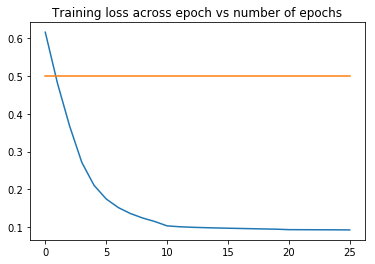

In [20]:
num_epochs = 100
e_losses=[]
loss_across_epoch=[]
model = Net_5(x_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
for e in range(num_epochs):
    e_losses = train_epoch(model,optimizer ,criteria,100)
    scheduler.step()
    if(len(loss_across_epoch)>1):
        if(loss_across_epoch[-1]-e_losses)<0.0001:
            num_epochs=e
        else:
            loss_across_epoch.append(e_losses)
    else:
        loss_across_epoch.append(e_losses)
        
print("Stopped running at ",len(loss_across_epoch)," epochs rather than 100 epochs")
print("Accuracy for the testing data ")
dummy=testingAccuracy(model,x_test,output)
print("Accuracy for the training data")
dummy=testingAccuracy(model,x_train,labels_accuracy)#train_numpy[:,-1].astype('float64'))
plt.title('Training loss across epoch vs number of epochs')
plt.plot(loss_across_epoch)
baseline_error_plot1 = baseline_error_plot[:len(loss_across_epoch)]
plt.plot(baseline_error_plot1)
plt.show()

### Part (d) Plot of the training loss obtained by considering the entire training data as a batch

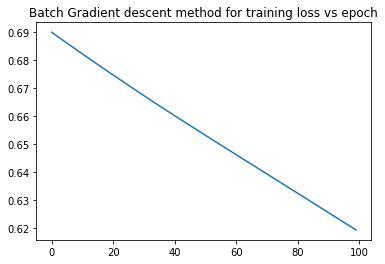

In [21]:
plt.title('Batch Gradient descent method for training loss vs epoch')
plt.plot(loss_to_plot_batch)

### Part (e) Varied the number of hidden layers(H) and created a model for each of it and plotted the training and testing error

Training accuracy for H  1
Accuracy is  21.232960825248682
Testing accuracy for H  1
Accuracy is  21.011074651353567
Training accuracy for H  2
Accuracy is  27.029350362274347
Testing accuracy for H  2
Accuracy is  21.97497949138638
Training accuracy for H  5
Accuracy is  20.054034139751934
Testing accuracy for H  5
Accuracy is  21.011074651353567
Training accuracy for H  10
Accuracy is  78.76703917475132
Testing accuracy for H  10
Accuracy is  78.98892534864643
Training accuracy for H  20
Accuracy is  78.76703917475132
Testing accuracy for H  20
Accuracy is  78.98892534864643


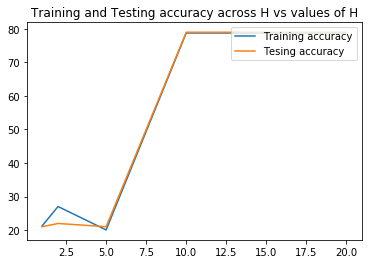

In [22]:
x_axis=[1,2,5,10,20]
training_accuracy_every_H=[]
testing_accuracy_every_H=[]
num_epochs=100
for H in [1,2,5,10,20]:
    model = Net_H(x_train.shape[1],H)
    optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
    for e in range(num_epochs):
        e_losses = train_epoch(model,optimizer ,criteria,x_train.shape[0])
        scheduler.step()
    print("Training accuracy for H ",H)
    training_accuracy_every_H.append(testingAccuracy(model,x_train,labels_accuracy))#train_numpy[:,-1].astype('float64')))
    print("Testing accuracy for H ",H)
    testing_accuracy_every_H.append(testingAccuracy(model,x_test,output))
plt.title('Training and Testing accuracy across H vs values of H')
plt.plot(x_axis,training_accuracy_every_H)
plt.plot(x_axis,testing_accuracy_every_H)
plt.legend(['Training accuracy','Tesing accuracy'], loc='upper right')
plt.show()

### Part (f) Changed the BCELoss to MSELoss and performed the training and testing again

In [23]:
criteria= nn.MSELoss()

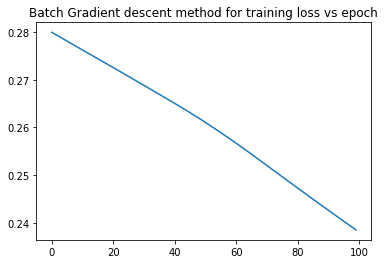

In [24]:
model = Net_5(x_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
loss_to_plot_batch=[]
for e in range(num_epochs):
    e_losses = train_epoch(model,optimizer ,criteria,x_train.shape[0])
    loss_to_plot_batch.append(e_losses)
plt.title('Batch Gradient descent method for training loss vs epoch')
plt.plot(loss_to_plot_batch)

In [25]:
for param in model.parameters ():
    print(param.data)

tensor([[ 0.2234, -0.2948, -0.3368, -0.2196,  0.2716],
        [ 0.0127,  0.1169, -0.0080,  0.1451, -0.3235],
        [-0.3787, -0.2521, -0.0868, -0.2133, -0.3357],
        [ 0.5344,  0.4497, -0.4653,  0.0540, -0.2178],
        [-0.3834,  0.1587,  0.2533, -0.2416,  0.1362]])
tensor([ 0.1882, -0.2834, -0.2893,  0.1337, -0.1426])
tensor([[-0.3010,  0.1407,  0.0881, -0.5175,  0.0107]])
tensor([0.1828])


Criterai is  MSELoss()
Stopped running at  25  epochs instead of 100
Accuracy is  89.80721903199344
Accuracy for the training data
Accuracy is  96.1930492447501


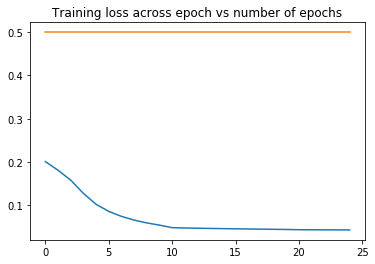

In [26]:

print("Criterai is ",criteria)

e_losses=[]
loss_across_epoch=[]
model = Net_5(x_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
for e in range(num_epochs):
    e_losses = train_epoch(model,optimizer ,criteria,100)
    scheduler.step()
    if(len(loss_across_epoch)>1):
        if(loss_across_epoch[-1]-e_losses)<0.0001:
            num_epochs=e
        else:
            loss_across_epoch.append(e_losses)
    else:
        loss_across_epoch.append(e_losses)
print("Stopped running at ",len(loss_across_epoch)," epochs instead of 100")



dummy=testingAccuracy(model,x_test,output)
print("Accuracy for the training data")
dummy=testingAccuracy(model,x_train,labels_accuracy)#train_numpy[:,-1].astype('float64'))
plt.title('Training loss across epoch vs number of epochs')

'''needed_index= 0
min_change=0.001
for i in range(1,len(loss_across_epoch)):
    if(loss_across_epoch[i-1]-loss_across_epoch[i]< min_change):
        print("Should stop at index ",i)
        needed_index = i
        break
loss_across_epoch=loss_across_epoch[:needed_index]'''
plt.plot(loss_across_epoch)    
baseline_error_plot1 = baseline_error_plot[:len(loss_across_epoch)]
plt.plot(baseline_error_plot1)
plt.show()

Accuracy is  96.80707356011298
Accuracy is  93.94995898277276
Accuracy is  78.76703917475132
Accuracy is  78.98892534864643
Accuracy is  96.43865897089525
Accuracy is  86.83347005742412
Accuracy is  97.67898808792829
Accuracy is  94.26784249384743
Accuracy is  98.01056121822424
Accuracy is  94.28835110746515


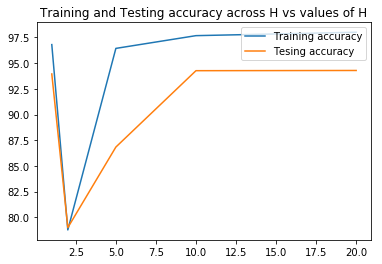

In [27]:
epochs=100
x_axis=[1,2,5,10,20]
training_accuracy_every_H=[]
testing_accuracy_every_H=[]
for H in [1,2,5,10,20]:
    model = Net_H(x_train.shape[1],H)
    optimizer = torch.optim.Adam(model.parameters(),lr=0.1)
    scheduler = StepLR(optimizer, step_size=30, gamma=0.1)
    for e in range(num_epochs):
        e_losses = train_epoch(model,optimizer,criteria,x_train.shape[0])
        scheduler.step()
    training_accuracy_every_H.append(testingAccuracy(model,x_train,labels_accuracy))#train_numpy[:,-1].astype('float64')))
    testing_accuracy_every_H.append(testingAccuracy(model,x_test,output))
plt.title('Training and Testing accuracy across H vs values of H')
plt.plot(x_axis,training_accuracy_every_H)
plt.plot(x_axis,testing_accuracy_every_H)
plt.legend(['Training accuracy','Tesing accuracy'], loc='upper right')
plt.show()

### Part(g) Created a two layer network and obtained the test accuracy for every combination for H1 and H2

In [29]:
num_epochs=100
criteria= nn.BCELoss()
for H1 in [1,2,5,10,20]:
    for H2 in [15,120,220,230]:
        print()
        print("H1 has ",H1,' neurons and H2 has',H2,' neurons')
        model = Net_2Layer(x_train.shape[1],H1,H2)
        optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
        for e in range(num_epochs):
            e_losses = train_epoch(model,optimizer ,criteria,x_train.shape[0])
        print("Testing accuracy for the 2 layer for the model with H1 ",H1," and H2 ",H2)
        testingAccuracy(model,x_test,output)
        print("Training accuracy for the same model ")
        testingAccuracy(model,x_train,labels_accuracy)


H1 has  1  neurons and H2 has 15  neurons
Testing accuracy for the 2 layer for the model with H1  1  and H2  15
Accuracy is  94.27809680065627
Training accuracy for the same model 
Accuracy is  95.4070981210856

H1 has  1  neurons and H2 has 120  neurons
Testing accuracy for the 2 layer for the model with H1  1  and H2  120
Accuracy is  86.93601312551272
Training accuracy for the same model 
Accuracy is  96.1930492447501

H1 has  1  neurons and H2 has 220  neurons
Testing accuracy for the 2 layer for the model with H1  1  and H2  220
Accuracy is  78.98892534864643
Training accuracy for the same model 
Accuracy is  78.76703917475132

H1 has  1  neurons and H2 has 230  neurons
Testing accuracy for the 2 layer for the model with H1  1  and H2  230
Accuracy is  86.51558654634947
Training accuracy for the same model 
Accuracy is  97.05268328625813

H1 has  2  neurons and H2 has 15  neurons
Testing accuracy for the 2 layer for the model with H1  2  and H2  15
Accuracy is  78.98892534864643
